In [28]:
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib import cm

import tensorflow as tf
import numpy as np

#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

In [34]:
def DisplayArray(a, fmt='png', rng=[0,1]):
  """Display an array as a picture."""
  a = (a - rng[0])/float(rng[1] - rng[0])*255
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(cm.viridis(a, bytes=True)).save(f, fmt)
  clear_output(wait = True)
  display(Image(data=f.getvalue()))

In [35]:
sess = tf.InteractiveSession()


In [36]:
def make_kernel(a):
  """Transform a 2D array into a convolution kernel"""
  a = np.asarray(a)
  a = a.reshape(list(a.shape) + [1,1])
  return tf.constant(a, dtype=1)

def simple_conv(x, k):
  """A simplified 2D convolution operation"""
  x = tf.expand_dims(tf.expand_dims(x, 0), -1)
  y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
  return y[0, :, :, 0]

def laplace(x):
  """Compute the 2D laplacian of an array"""
  laplace_k = make_kernel([[0.5, 1.0, 0.5],
                           [1.0, -6., 1.0],
                           [0.5, 1.0, 0.5]])
  return simple_conv(x, laplace_k)

In [41]:
N = 200

# Set everything to zero
a_init = np.zeros([N, N], dtype=np.float32)
at_init = np.zeros([N, N], dtype=np.float32)

# Initial conditions
size=10
c1 = int(N/2-size)
c2 = int(N/2+size)
a_init[c1:c2, c1:c2] = 1.0

DisplayArray(a_init, rng=[0, 1.0])


TypeError: 'module' object is not callable

In [38]:
a_init[0:10,0:10]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [39]:
# Create variables for simulation state
A = tf.Variable(a_init)

# Parameters
dt = tf.placeholder(tf.float32, shape=())
D  = tf.placeholder(tf.float32, shape=())



In [40]:
# Discretized PDE update rules
A_ = A + dt*(laplace(A))

In [19]:
# Operation to update the state
step = tf.group(
  A.assign(A_))

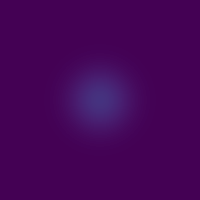

In [33]:
# Initialize state to initial conditions
tf.global_variables_initializer().run()

stoptime = 1000
from ipywidgets import FloatProgress
from IPython.display import display
f = FloatProgress(min=0, max=stoptime)
display(f)

#fig, ax = plt.subplots()
#cax = ax.imshow(a_init)
#cbar = fig.colorbar(cax)

# Run 1000 steps of PDE§
for i in range(stoptime):
    f.value = i
    # Step simulation
    step.run({
            dt: 0.1,
            D: 0.1})
    
    #im.set_data(At.eval())
    #ax.draw()
    if i % 10 == 0:
        arr = A.eval()
        cax = ax.imshow(arr)
        DisplayArray(A.eval(), rng=[0,1.0])
       
#arr = A.eval()
#cax = ax.imshow(arr)
#cbar = fig.colorbar(cax)
